In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/SHIV/Shiva/dataset_isic.zip"

Archive:  /content/drive/MyDrive/SHIV/Shiva/dataset_isic.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  i

To manage activities related to picture preprocessing, data manipulation, algorithms for learning, and deep learning, this code imports a number of libraries and modules. It begins by importing libraries like pandas for data processing, numpy for arithmetic calculations, OpenCV and PIL for image editing, and imbalanced-learn for SMOTE oversampling. Next, it has tools for one-hot encoding labels, value counting, and dataset separation. The code leverages architectures such as InceptionV3, MobileNetV3, as well as EfficientNetB7 to set up deep learning frameworks utilizing TensorFlow/Keras for model construction, training, and evaluation. Furthermore, it employs performance measurements including precision, recall, and F1-scores for assessment and integrates K-fold cross-validation for strong model validation. Additionally included are visualization tools for exploratory analysis of data and outcome display, such as Seaborn and Matplotlib.

In [ ]:
# using this library we handle image shape
import cv2
#Importing the library to carry out math operations
import numpy as nmy
# we use this method for handling the operating system
import os
#Module to locate every file path that fits a given pattern
import glob
# applying the method for getting the dataset
import random
# Progress bar creation framework
import tqdm
# Preprocessing tools for image data
from PIL import Image, ImageEnhance
##apply this library for manupulation-reviws
import pandas as p_nd
# using this method we blanace the information
from imblearn.over_sampling import SMOTE
# applying the library for dividing the dataset
from sklearn.model_selection import train_test_split
#here we use it to counting the values
from collections import Counter
# converting the data applied this method
from tensorflow.keras.utils import to_categorical
# Parametric library for tasks involving deep learning
import tensorflow as tf
# applying the models with the parameters and valeus
from tensorflow.keras.applications import InceptionV3,MobileNetV3Large
# Functional API to define and manipulate Keras models
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input,Concatenate,Dropout
# using the label in the models K-fold cross-validation for model validation
from tensorflow.keras.models import Model
# Modeling compilation using the optimizer for Adam
from tensorflow.keras.optimizers import Adam
# applying the models with the parameters and valeus
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import (GlobalAveragePooling2D,Concatenate,Dense,Dropout,Conv2D,MaxPooling2D,Flatten)
# using the folding of the models
from sklearn.model_selection import KFold
#getting this library for claculating the processing
import seaborn as sns
#applying the method data-frame in order to plot
import matplotlib.pyplot as m_p_t
# Adding other measures to calculate the outcome
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
Skin_cancer_ISIC_df=glob.glob("/content/Skin cancer ISIC The International Skin Imaging Collaboration/*/*/*")

In [ ]:
len(Skin_cancer_ISIC_df)

2357

In [ ]:
Skin_cancer_ISIC_df

['//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0033675.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029973.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0032468.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0033860.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029052.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029824.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0031735.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025594.jpg',
 '//content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatof

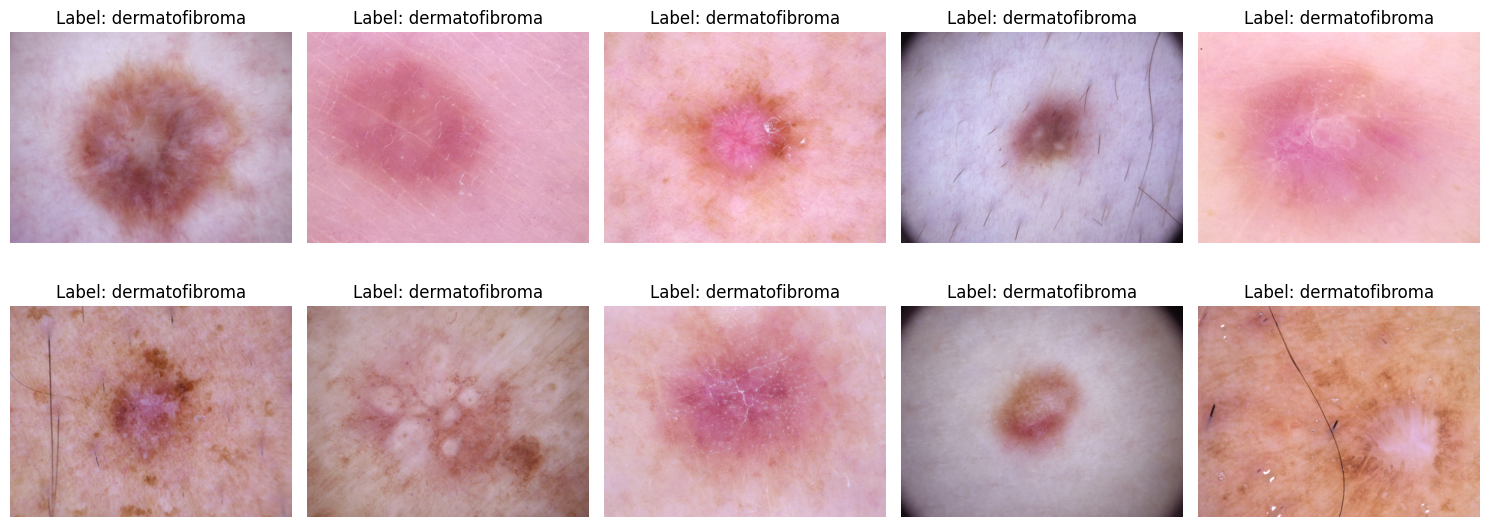

In [ ]:
# Create a figure with subplots (2 rows and 5 columns)
fig, axs = m_p_t.subplots(2, 5, figsize=(15, 6))

# Loop through the first 10 images and display them
for i in range(10):
    image_path = Skin_cancer_ISIC_df[i]
    # Extract label from the path
    label = image_path.split('/')[-2]

    # Go through and change the picture
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    # Determine the subplot location (row, column)
    row = i // 5  # 0 for the first row, 1 for the second row
    col = i % 5   # 0 to 4 for each column

    # Making the picture visible in the subplot.
    axs[row,col].imshow(image)
    axs[row,col].set_title(f"Label: {label}")
    axs[row,col].axis('off')

# Adjust the layout to prevent overlap
m_p_t.tight_layout()
m_p_t.show()

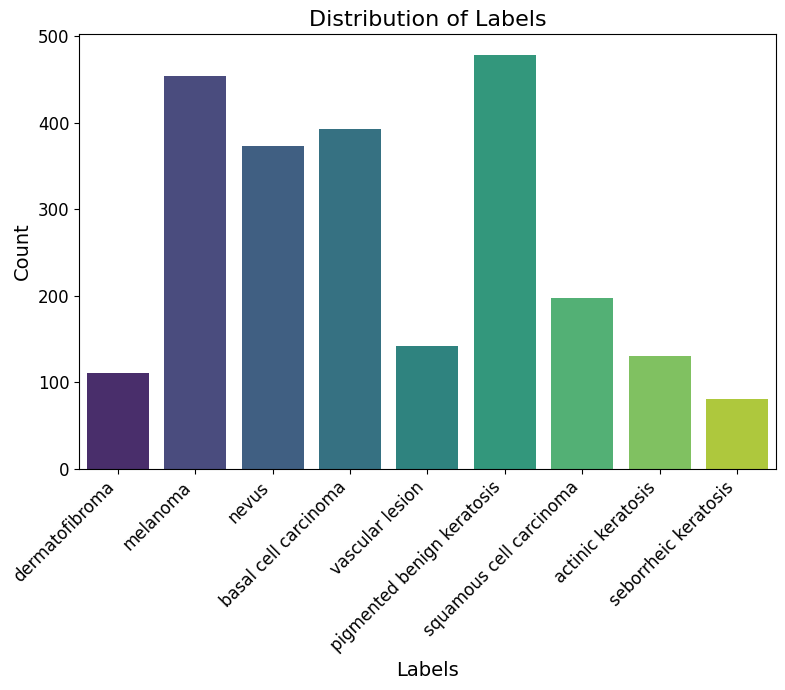

In [ ]:
#list is already defined as in the previous code
labels = [image_path.split('/')[-2] for image_path in Skin_cancer_ISIC_df]

# Defining how many times each label appears.
label_counts={}
# applying the looping with the valeus
for label in labels:
    # getting the tag in the plot
    label_counts[label]=label_counts.get(label, 0) + 1

# Producing a counting with enhanced visual appeal.
m_p_t.figure(figsize=(8, 7))

sns.countplot(x=labels,hue=labels,palette="viridis",dodge=False,legend=False)
m_p_t.title("Distribution of Labels",fontsize=16)
m_p_t.xlabel("Labels",fontsize=14)
m_p_t.ylabel("Count",fontsize=14)
# To make x-axis labels easier to read, rotate them.
m_p_t.xticks(rotation=45,ha="right",fontsize=12)
m_p_t.yticks(fontsize=12)
m_p_t.tight_layout()
m_p_t.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.0 MB/s eta 0:00:00


In [ ]:
import pywt

Several preparation techniques are applied in this code to improve a dataset of skin cancer photos and get them ready for machine learning tasks. Each picture is resized to a consistent 224x224 pixel size and converted to monochromatic for wavelet-based noise reduction using the Discrete Wavelet Transform (DWT) as it iterates over the image file locations in Skin_cancer_ISIC_df. Gaussian blur is applied to further decrease noise in the denoised grayscale picture after it has been converted back to RGB and normalized to a range of [0, 1]. CLAHE (Contrast Limited Adaptive Histogram Equalization) is used to boost the contrast channel-wise, and the improved picture is then normalized once again. A prepared dictionary that maps cancer kinds to numerical values is used to extract labels from the file directories.For later usage in model training or analysis, the preprocessed pictures and their associated labels are saved in df and labels.Using tqdm, a progress bar shows the progress.

In [ ]:
# Establish up lists to hold processed information and labels.
isci_df=[]
Labels=[]

# Give the label dictionary a definition.
label_dict = {"basal cell carcinoma": 0,"melanoma": 1,"squamous cell carcinoma": 2,}

# Initialize the method object
clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

def dwt_denoise(img, wavelet='haar',level=1):
    coeffs = pywt.wavedec2(img,wavelet,level=level)
    # Zero out detail coefficients (thresholding step)
    coeffs_H = list(coeffs)
    coeffs_H[1:] = [(nmy.zeros_like(cH), nmy.zeros_like(cV), nmy.zeros_like(cD)) for cH, cV, cD in coeffs_H[1:]]
    # Reconstruct the image
    denoised_img = pywt.waverec2(coeffs_H, wavelet)
    return nmy.clip(denoised_img, 0, 255).astype('uint8')

# Iterate through the Skin_cancer_ISIC_dfset using tqdm for a progress bar
for i in tqdm.tqdm(range(len(Skin_cancer_ISIC_df))):
    # Read the image
    img = cv2.imread(Skin_cancer_ISIC_df[i])
    if img is None:
        continue  # Skip if the image could not be loaded

    # Resize the image to 224x224 pixels to ensure uniformity
    img=cv2.resize(img, (224, 224))

    # To enable DWT denoising, convert the picture to grayscale.
    gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply DWT denoising
    denoised_gray = dwt_denoise(gray_img)

    # Convert back to RGB format for further processing
    denoised_img = cv2.cvtColor(denoised_gray, cv2.COLOR_GRAY2BGR)

    # Normalize pixel values to [0, 1]
    img_Normalize = denoised_img.astype('float32') / 255.0

    # Apply Gaussian blur to the normalized image to reduce noise
    blrd = cv2.GaussianBlur(img_Normalize, (5, 5), 0)

    # Convert the image from BGR to RGB
    RGB_img = cv2.cvtColor(blrd, cv2.COLOR_BGR2RGB)

    # getting each channel separately for contrast enhancement
    channels=cv2.split(RGB_img)
    enhanced_channels = []

    for channel in channels:
        # Applyied on each channel (to improve contrast)
        enhanced_channel=clahe.apply((channel * 255).astype('uint8'))
        enhanced_channels.append(enhanced_channel)

    # Merge the enhanced channels back into one image
    enhanced_img = cv2.merge(enhanced_channels)

    # Normalize the enhanced image again
    enhanced_img_normalized = enhanced_img.astype('float32') / 255.0

    # Extract the class label from the file path
    label = Skin_cancer_ISIC_df[i].split(os.path.sep)[-2]

    # Verify whether the label is present in the label dictionary.
    if label in label_dict:
        # Append the processed image to the Skin_cancer_ISIC_df list
        isci_df.append(enhanced_img_normalized)
        # Append the corresponding label to the label list
        Labels.append(label_dict[label])


100%|██████████| 2357/2357 [00:29<00:00, 80.40it/s]


In [ ]:
# Printing the final sizes of the processed labels
print(f"Processed {len(isci_df)} images.")
print(f"Corresponding labels count: {len(Labels)}")

Processed 1043 images.
Corresponding labels count: 1043


In [ ]:
# Converting the list of images to NumPy arrays.
X=nmy.array(isci_df)
y=nmy.array(Labels)

print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (images): (1043, 224, 224, 3)
Shape of y (labels): (1043,)


In [ ]:
# apply smote proper give code
# Chest_X_Ray_df and Labels are defined as in the previous code
# Reshape the image Skin_cancer_ISIC_df for SMOTE
X_reshaped=X.reshape(X.shape[0], -1)

# Applying the balancing technique with the dataset
smote=SMOTE(random_state=42)
# getting the data to the library for balancing
X_smote,Labels_smote=smote.fit_resample(X_reshaped,Labels)

# Reshaping the image back to its original shape
X_smote=X_smote.reshape(-1, 224, 224, 3)

# Print class distribution after metod
print("Class distribution after SMOTE:", Counter(Labels_smote))

Class distribution after SMOTE: Counter({1: 454, 0: 454, 2: 454})


# split Skin_cancer_ISIC_dataset train test 80 , 20

In [ ]:
#The data should be divided into test and training sets.
X_train,X_test,y_train,y_test=train_test_split(X_smote,Labels_smote,test_size=0.2,random_state=100)

# Converting y_test and y_train to arrays in NumPy
y_train=nmy.array(y_train)
# getting the arrays with this method
y_test=nmy.array(y_test)

# Outputing the resultant arrays' forms.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1089, 224, 224, 3)
Shape of X_test: (273, 224, 224, 3)
Shape of y_train: (1089,)
Shape of y_test: (273,)


In [ ]:
y_train=to_categorical(y_train,num_classes=3)
y_test=to_categorical(y_test,num_classes=3)

In [ ]:
y_train.shape, y_test.shape

((1089, 3), (273, 3))

#TripleVisionNet (MobileNetV3Large, InceptionV3, EfficientNetB7)Model-

In [ ]:
# Setting the input shape for picture inputs to 224x224x3 and initialize the MobileNetV3Large model, which was pre-trained on the ImageNet dataset except for the top (completely connected) layers.
mobilenet_v3=MobileNetV3Large(weights='imagenet',include_top=False,input_shape=(224,224,3))
# Setted the input shape to the InceptionV3 model that has already been trained on it, excluding the top layers.
inceptionV3=InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))
# Use an input shape to initialize the EfficientNetB7 model, which has already been trained on the ImageNet dataset with the top layers removed.
efficientnet_b7=EfficientNetB7(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

# Freezing the layers of the pre-trained models
mobilenet_v3.trainable=False
inceptionV3.trainable=False
efficientnet_b7.trainable=False

# Specifying the input for the model.
input_layer=tf.keras.Input(shape=(224, 224, 3))

# Extract features using the pre-trained models
mobilenet_v3_features = mobilenet_v3(input_layer)
inceptionV3_features = inceptionV3(input_layer)
efficientnet_b7_features = efficientnet_b7(input_layer)

# Global Average Pooling to reduce dimensions of the feature maps
mobilenet_v3_pool = GlobalAveragePooling2D()(mobilenet_v3_features)
inceptionV3_pool = GlobalAveragePooling2D()(inceptionV3_features)
efficientnet_b7_pool = GlobalAveragePooling2D()(efficientnet_b7_features)

# Concatenate the pooled features from all models
concatenated_features = Concatenate()([mobilenet_v3_pool,inceptionV3_pool,efficientnet_b7_pool])

# Adding a set of Conv2D layers to further refine the feature extraction
x=Conv2D(256,kernel_size=(3, 3),activation='relu')(input_layer)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Conv2D(450, kernel_size=(3, 3),activation='relu')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Flatten()(x)

# Concatenate with features from pre-trained models
x=Concatenate()([concatenated_features, x])

# Fully connected layers
x=Dense(524,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(1020,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1020,activation='relu')(x)
x=Dropout(0.5)(x)

# Output layer for classification (adjust number of classes as necessary)
output_layer=Dense(3,activation='softmax')(x)

# Identifying the completed hybrid vehicle and giving it a fitting moniker.
hybrid_model=Model(inputs=input_layer,outputs=output_layer,name="hybrid_model")
# transferring the mathematical models to the algorithm compilation
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

# Summarying of the hybrid model
hybrid_model.summary()


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "hybrid_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 222, 222, 256)  │          7,168 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 111, 111, 256)  │              0 │ conv2d_94[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MobileNetV3Large          │ (None, 7, 7, 960)      │      2,996,352 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inception_v3 (Functional) │ (None, 5, 5, 2048)     │     21,802,784 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb7            │ (None, 7, 7, 2560)     │     64,097,687 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 450)  │      1,037,250 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 960)            │              0 │ MobileNetV3Large[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ inception_v3[0][0]     │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2560)           │              0 │ efficientnetb7[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 54, 54, 450)    │              0 │ conv2d_95[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 5568)           │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1312200)        │              0 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 1317768)        │              0 │ concatenate_2[0][0],   │
│ (Concatenate)             │                        │                │ flatten[0][0]          │
├──────────────────────

 Total params: 782,032,180 (2.91 GB)

 Trainable params: 693,135,357 (2.58 GB)

 Non-trainable params: 88,896,823 (339.11 MB)

In [ ]:
# setting the stepwise parameters with the values
kf=KFold(n_splits=3,shuffle=True,random_state=100)
fold_no=1

# For storing validation results
all_fold_histories=[]
all_fold_scores=[]
# fitting the looping witht the traineed data
for train_index, val_index in kf.split(X_train):
    # showing the dataset with stepwise
    print(f"Training on fold {fold_no}...")

   # Separating the data for this fold into train as well as validation sets.
    X_train_fold,X_val_fold=X_train[train_index],X_train[val_index]
    # Dividing the trained and validation sets of data for this fold.
    y_train_fold,y_val_fold=y_train[train_index],y_train[val_index]

    # Training the model
    history=hybrid_model.fit(X_train_fold,y_train_fold,validation_data=(X_val_fold, y_val_fold),epochs=20,batch_size=80,verbose=1)

    fold_no += 1


Training on fold 1...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 258s 13s/step - accuracy: 0.3687 - loss: 2.0746 - val_accuracy: 0.3444 - val_loss: 1.0979
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.3491 - loss: 1.1333 - val_accuracy: 0.3333 - val_loss: 1.0927
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 336ms/step - accuracy: 0.3648 - loss: 1.0859 - val_accuracy: 0.3030 - val_loss: 1.0906
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.3543 - loss: 1.0972 - val_accuracy: 0.3719 - val_loss: 1.0839
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 336ms/step - accuracy: 0.3552 - loss: 1.0917 - val_accuracy: 0.4160 - val_loss: 1.0787
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.4519 - loss: 1.0686 - val_accuracy: 0.3967 - val_loss: 1.0733
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.4352 - loss: 1.0693 - val_accuracy: 0.4518 - val_loss: 1.0649
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.4170 - loss: 1.0

This code visualizes the training and validation accuracy and loss across epochs for a deep learning model using Matplotlib. It begins by creating a figure with a specified size, then organizes the plots into a grid with one row and two columns. The first subplot charts training and validation accuracy values over epochs, labeling the axes, adding a legend, and setting a title to indicate the plot's purpose. Similarly, the second subplot displays the training and validation loss values over epochs with appropriate labels, legend, and title. The tight_layout method ensures the subplots do not overlap, and the show function renders the plots for visualization. This provides a clear comparison of model performance during training and validation.

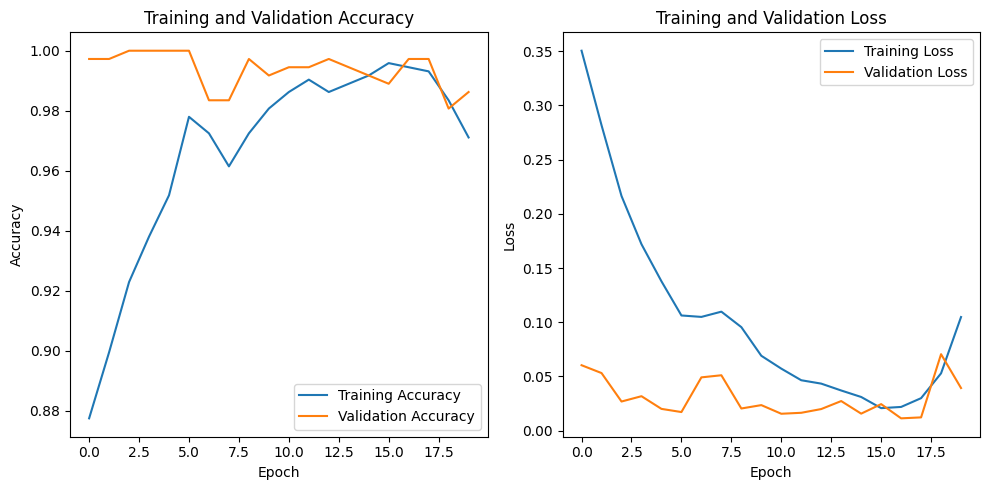

In [ ]:
# Making a new figure that is a certain size
m_p_t.figure(figsize=(10,5))
# In a grid with one row and two columns, create the first subplot.
m_p_t.subplot(1, 2, 1)
# Charting training accuracy values across time periods
m_p_t.plot(history.history['accuracy'],label='Training Accuracy')
#Plotting numbers for validation accuracy throughout epochs.
m_p_t.plot(history.history['val_accuracy'],label='Validation Accuracy')
# Assign the x-axis label in the graph
m_p_t.xlabel('Epoch')
# setting the y-label in the plot
m_p_t.ylabel('Accuracy')
# adding the legending with the model
m_p_t.legend()
# printing the headertext in the plot
m_p_t.title('Training and Validation Accuracy')
# In a grid with one row and two columns, create the second subplot.
m_p_t.subplot(1, 2, 2)
# Plotting the values of training loss across epochs.
m_p_t.plot(history.history['loss'],label='Training Loss')
# Charting validation loss values throughout time periods
m_p_t.plot(history.history['val_loss'], label='Validation Loss')
# printing the x-label in the plot
m_p_t.xlabel('Epoch')
#  adding the y-lbl in the graph
m_p_t.ylabel('Loss')
# showing the legending in the plot
m_p_t.legend()
# adding the headertext in the plot
m_p_t.title('Training and Validation Loss')
# setting the layout in the graph
m_p_t.tight_layout()
# visualizing the graph
m_p_t.show()

In [ ]:
loss,accuracy=hybrid_model.evaluate(X_train_fold,y_train_fold,verbose=0)
print(f"y_train Loss: {loss:.4f}")
print(f"y_train Accuracy: {accuracy:.4f}")

y_train Loss: 0.0166
y_train Accuracy: 1.0000


In [ ]:
loss,accuracy=hybrid_model.evaluate(X_val_fold, y_val_fold, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0394
Test Accuracy: 0.9862


#training results

In [ ]:
# Using the para-meters and values to calculate the score
pren=precision_score(y_true,y_pred_classes,average='weighted')
# obtaining the values using the parameters and para-meters
recl=recall_score(y_true,y_pred_classes,average='weighted')
# using the testing data-set's score
f1=f1_score(y_true,y_pred_classes,average='weighted')
#The models' reliability values are displayed.
print(f"Precision: {pren:.4f}")
# presenting the algorithms' output
print(f"Recall: {recl:.4f}")
# see this kind of outcome
print(f"F1-score: {f1:.4f}")

Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


23/23 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step


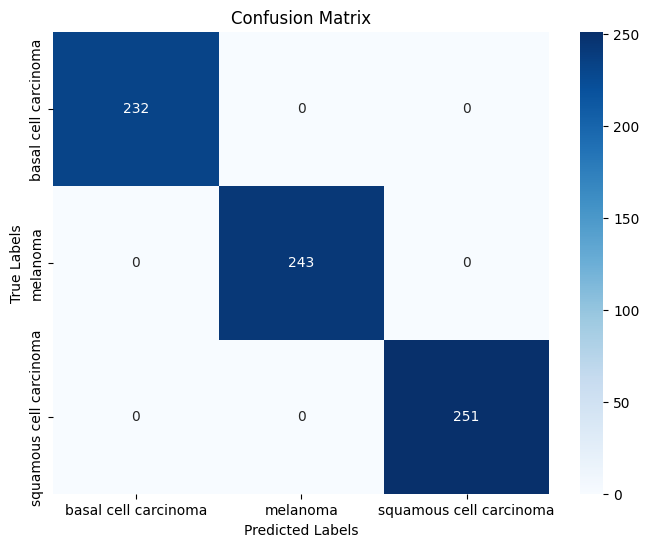

In [ ]:
# Using the hybrid model to forecast the training fold's probability.
y_pred=hybrid_model.predict(X_train_fold)
# Choosing the most probable class to convert expected probabilities to class labels.
y_pred_classes=nmy.argmax(y_pred,axis=1)
# selecting the index to translate the training fold's one-hot encoded true labels to class labels.
y_true=nmy.argmax(y_train_fold,axis=1)
## finding the values of this matrics with parameters
conf_matrix=confusion_matrix(y_true,y_pred_classes)
# provising the shape of the graph
m_p_t.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["basal cell carcinoma", "melanoma", "squamous cell carcinoma"],yticklabels=["basal cell carcinoma", "melanoma", "squamous cell carcinoma"])
# getting the x-lbl in the plot
m_p_t.xlabel("Predicted Labels")
# setting the y-lbl in the graph
m_p_t.ylabel("True Labels")
# printing the headertext in the graph
m_p_t.title("Confusion Matrix")
# displaying the plot
m_p_t.show()

In [ ]:
print(classification_report(y_true, y_pred_classes, target_names=["basal cell carcinoma", "melanoma", "squamous cell carcinoma"]))

                         precision    recall  f1-score   support

   basal cell carcinoma       1.00      1.00      1.00       232
               melanoma       1.00      1.00      1.00       243
squamous cell carcinoma       1.00      1.00      1.00       251

               accuracy                           1.00       726
              macro avg       1.00      1.00      1.00       726
           weighted avg       1.00      1.00      1.00       726



#Testing results

In [ ]:
# Making a label prediction for the test set.
y_pred=hybrid_model.predict(X_val_fold)
# getting the value with library
y_pred_classes=nmy.argmax(y_pred,axis=1)
y_true_classes=nmy.argmax(y_val_fold, axis=1)

# Calculating the score with the parameters with values
acccy=accuracy_score(y_true_classes,y_pred_classes)
# Using of the confines and values to calculate the score
prion=precision_score(y_true_classes,y_pred_classes,average='weighted')
# getting the vlaues witht the parameters and values
rell=recall_score(y_true_classes,y_pred_classes,average='weighted')
# applying the score for the testing dataaset
f1=f1_score(y_true_classes,y_pred_classes,average='weighted')
# showing the the values of reability of the models
print(f"Accuracy: {acccy}")
# displaying the result of the algorithms
print(f"Precision: {prion}")
# visualize this type of result
print(f"Recall: {rell}")
print(f"F1-score: {f1}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Accuracy: 0.9862258953168044
Precision: 0.9864762342035069
Recall: 0.9862258953168044
F1-score: 0.9862020660936957


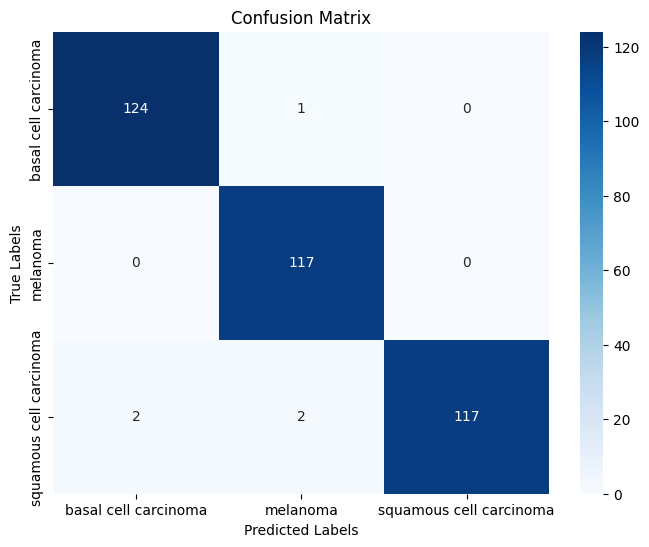

In [ ]:
# Creating the confusing mactrics
cm=confusion_matrix(y_true_classes,y_pred_classes)

#Using a graph to plot the matrics
m_p_t.figure(figsize=(8, 6))
## creating the confusing matrics with the values
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=['basal cell carcinoma', 'melanoma', 'squamous cell carcinoma'],yticklabels=['basal cell carcinoma', 'melanoma', 'squamous cell carcinoma'])
# printing the x-lable in the graph
m_p_t.xlabel("Predicted Labels")
# adding the y-label in the plot
m_p_t.ylabel("True Labels")
# setting the headertext in the confusioning matriac
m_p_t.title("Confusion Matrix")
m_p_t.show()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=["basal cell carcinoma", "melanoma", "squamous cell carcinoma"]))

                         precision    recall  f1-score   support

   basal cell carcinoma       0.98      0.99      0.99       125
               melanoma       0.97      1.00      0.99       117
squamous cell carcinoma       1.00      0.97      0.98       121

               accuracy                           0.99       363
              macro avg       0.99      0.99      0.99       363
           weighted avg       0.99      0.99      0.99       363



Using the first 10 photos from a validation dataset, this code displays the hybrid model's predictions. Using the predict technique, it first creates predictions for these pictures and then turns the expected probabilities into class labels. Class indices are mapped back to their respective label names using a reversed label dictionary. Matplotlib is then used to show the photos in a grid, converting each one from BGR to RGB for accurate color representation. To ascertain if the prediction is accurate, the real and anticipated labels for every image are compared.Along with the expected and real labels for the photos, a notation indicating whether the prediction was accurate is also included. Before displaying the finished visualization, the layout is modified for improved presentation.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


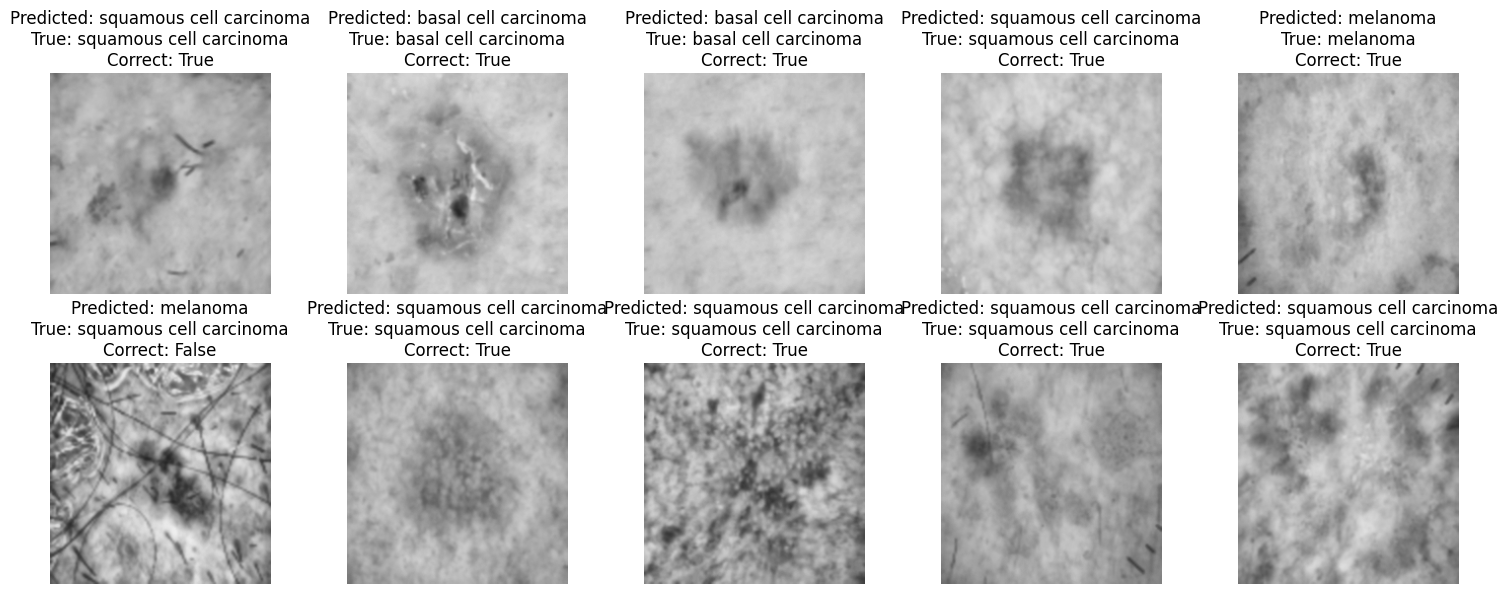

In [ ]:
# Obtain predictions for the validation set's first ten photos.
predictions=hybrid_model.predict(X_val_fold[:10])
#converting the values with this library
predicted_labels=nmy.argmax(predictions,axis=1)

# Reversing the label dictionary to map indices back to label names
label_dict_reversed={v: k for k, v in label_dict.items()}

# Displaying the images, their predicted labels, and whether the prediction is correct
fig,axes=m_p_t.subplots(2, 5,figsize=(15, 6))
# getting the iteration witht he values
for i, ax in enumerate(axes.flat):
    # To ensure proper color presentation, get the image as well as convert it from BGR to RGB.
    image=X_val_fold[i]
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    # Get predicted and true labels
    predicted_class = label_dict_reversed.get(predicted_labels[i], "Unknown")

    # Get the index of the true class from the one-hot encoded label
    true_class_index = nmy.argmax(y_val_fold[i])
    true_class = label_dict_reversed.get(true_class_index, "Unknown")

    # Determine if the prediction is correct
    is_correct = "True" if predicted_class == true_class else "False"

    # Showing the picture with the real and expected labels.
    ax.imshow(image)
    ax.set_title(f"Predicted: {predicted_class}\nTrue: {true_class}\nCorrect: {is_correct}")
    ax.axis('off')

m_p_t.tight_layout()
m_p_t.show()